In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
import statsmodels.stats.multitest

In [2]:
normalized_bulk_seq = pd.read_csv('/data/passala/Collaborator_Data/Penelope_Dave_Collab/Removed_low_correlation_data/NAM_RNAseq_normalizedNov22.csv', index_col= 0)
#normalized_bulk_seq = normalized_bulk_seq.drop(columns = ['CML333_1091/1092_1','CML333_1091/1092_2'])
bulk_seq_summary = pd.read_csv('/home/passala/passala/Collaborator_Data/Penelope_Dave_Collab/June_2022_DATA/NAM_RNAseq_metadata_no_outliers.csv',index_col= 0)

In [3]:
normalized_bulk_seq

,B73_1b,B73_2b,B73_1,B73_2,B73_3,B104_1,B104_2,B104_3,CML103_2b,CML103_3b,...,P39_1,P39_2,Tx303_1b,Tx303_2b,Oh43_1,Oh43_2,Oh43_3,Tzi8_1,Tzi8_2,Tzi8_3
GRMZM2G059865,90.541374,121.556549,137.921241,180.555358,185.148816,25.061684,35.184526,32.864122,70.399688,112.879931,...,133.706255,132.694456,120.321410,125.485032,127.477338,107.245698,114.630694,157.433638,209.542817,171.106883
GRMZM2G093344,2.190517,1.185918,2.028254,0.000000,0.000000,0.000000,0.000000,3.286412,0.670473,1.635941,...,1.133104,0.000000,0.581263,0.000000,0.000000,1.140912,0.000000,0.000000,0.000000,0.000000
GRMZM2G093399,0.000000,0.000000,0.000000,1.203702,0.000000,0.000000,0.000000,0.000000,4.022839,2.453912,...,0.000000,0.000000,9.881468,4.765254,0.000000,0.000000,0.000000,8.143119,3.697814,5.741842
GRMZM5G809743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM5G833153,0.000000,0.000000,0.676085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS3.1,8.762068,8.301423,10.141268,4.814810,12.074923,8.353895,8.444286,10.954707,10.057098,8.179705,...,10.197935,8.444193,8.137680,14.295763,14.851729,12.550028,6.427889,4.071560,7.395629,8.038578
NDHD,0.730172,0.000000,0.000000,0.000000,4.024974,0.000000,2.814762,0.000000,0.000000,0.817971,...,2.266208,1.206313,0.581263,6.353672,1.237644,1.140912,0.000000,1.357187,1.232605,3.445105
PSAC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC191109.3_FG001,0.000000,1.185918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.399312,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
bulk_seq_summary

,condition,size,size_bin,batch
sampName,,,,
B73_1b,B73,454.888985,c,2
B73_2b,B73,454.888985,c,2
B73_1,B73,454.888985,c,1
B73_2,B73,454.888985,c,1
B73_3,B73,454.888985,c,1
...,...,...,...,...
Oh43_2,Oh43,341.000000,b,1
Oh43_3,Oh43,341.000000,b,1
Tzi8_1,Tzi8,406.175635,c,1


In [5]:
corr_table = normalized_bulk_seq.corr(method = 'spearman')

In [6]:
corr_table.shape

(74, 74)

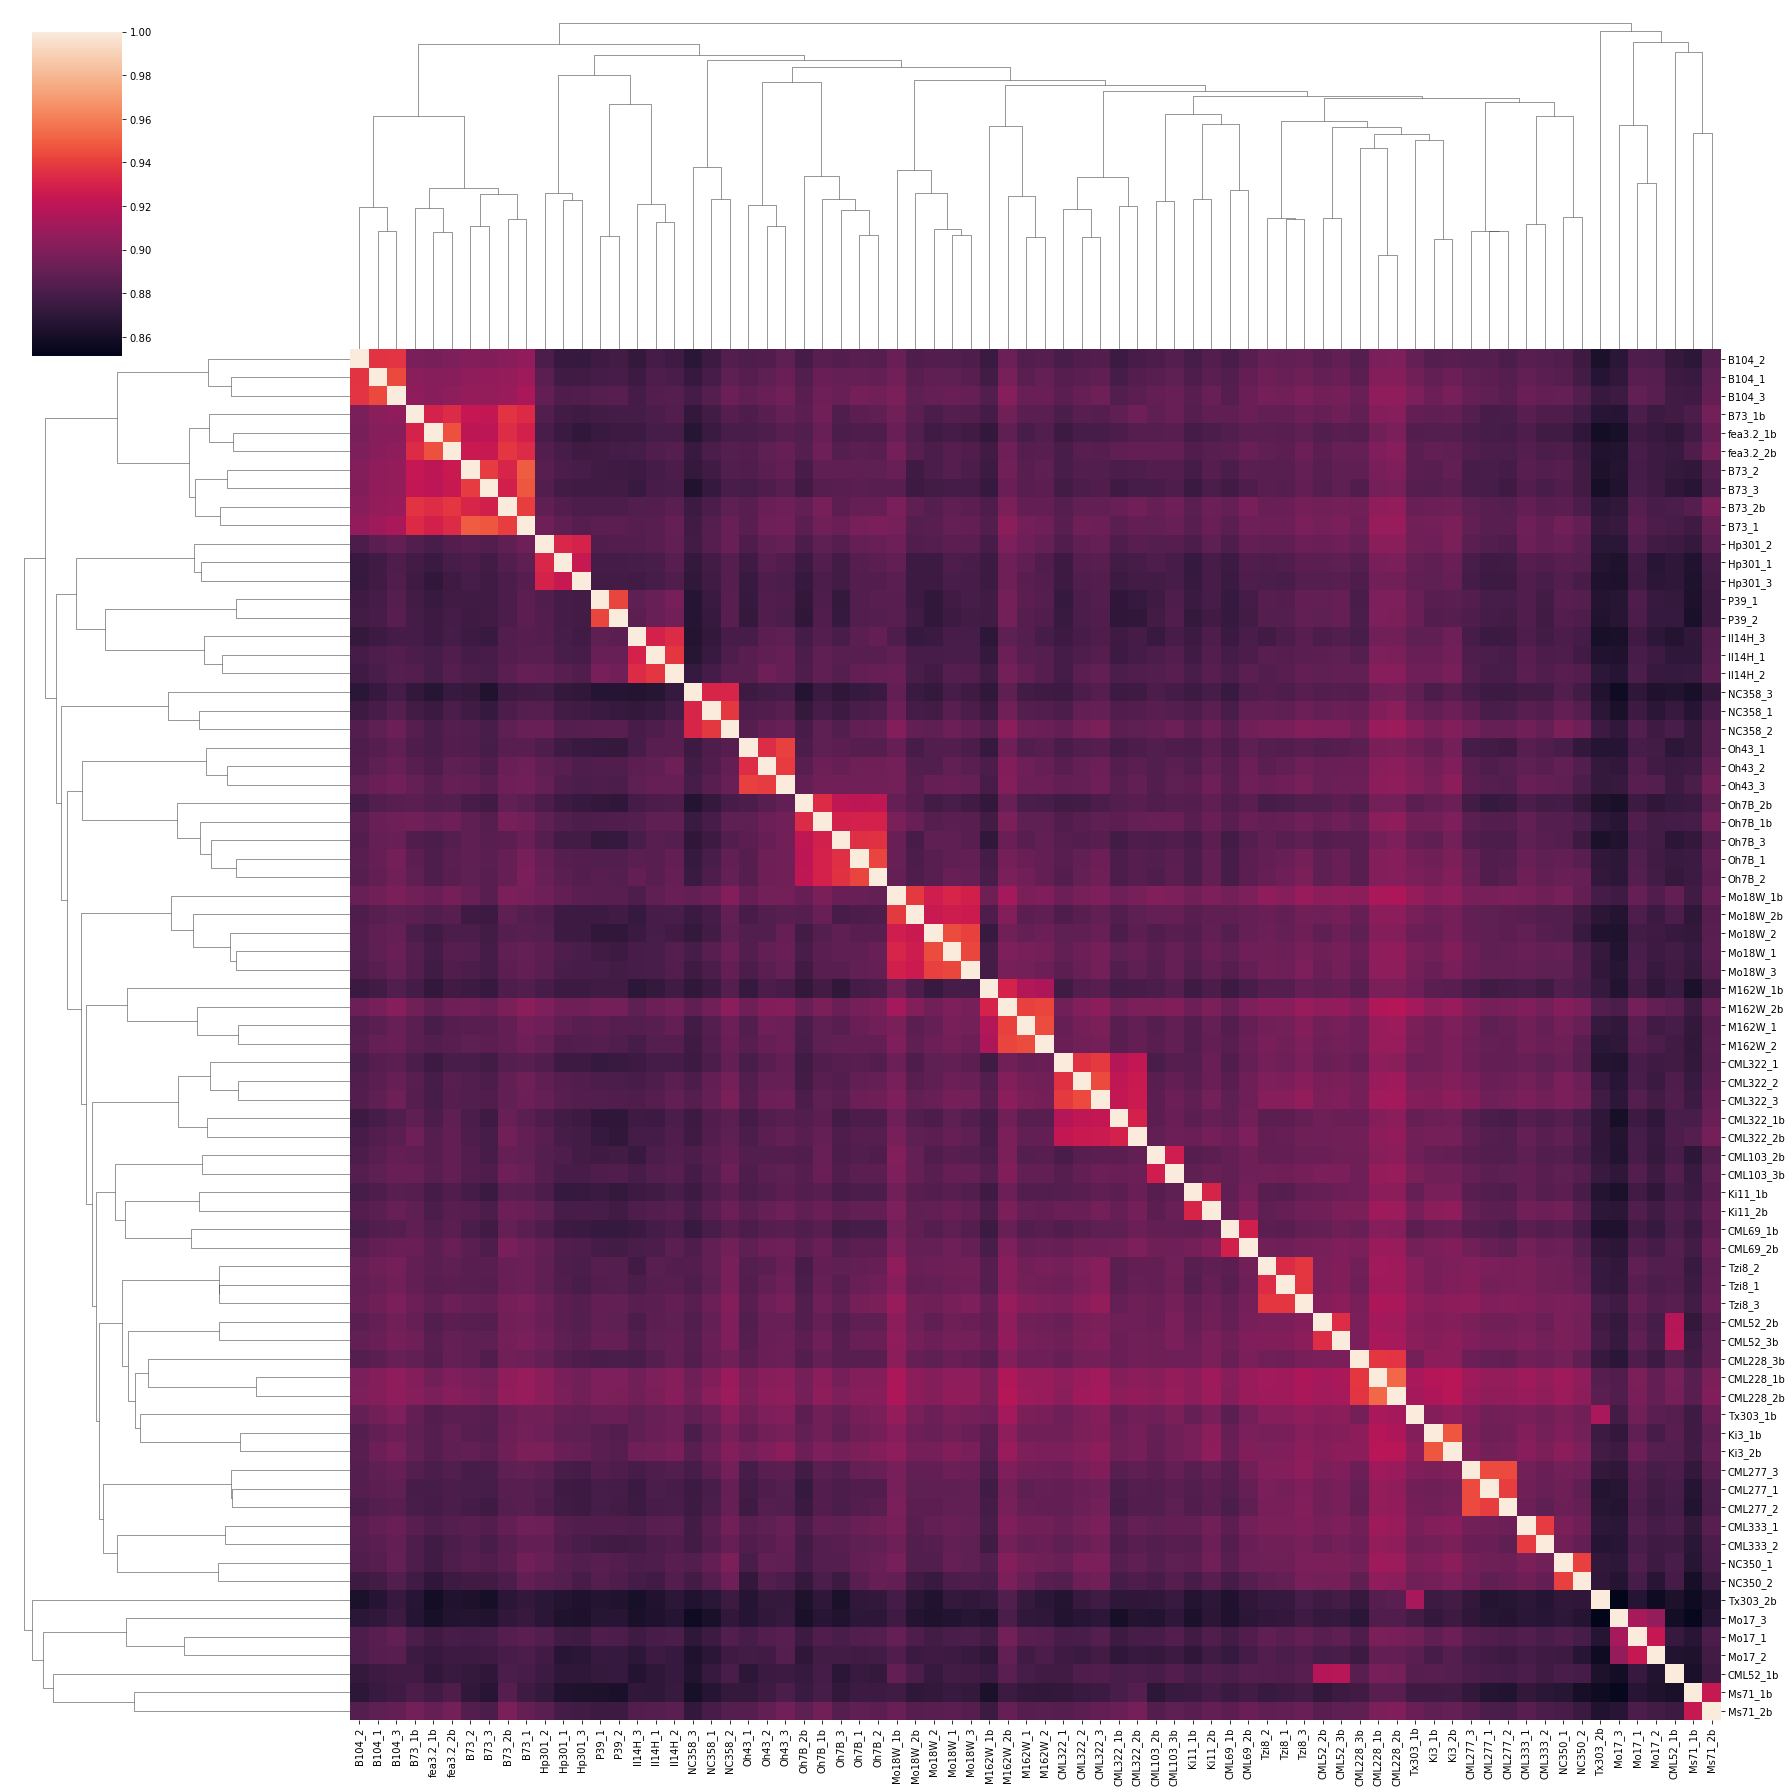

In [7]:
sns.clustermap(corr_table, metric = 'euclidean', figsize= (25,25))


In [8]:
bulk_seq_summary = bulk_seq_summary.drop_duplicates(subset= ['condition'], keep= 'first')
bulk_seq_summary.at['fea3.2_1b','condition'] = 'fea3.2'


In [9]:
NAM_line_list = bulk_seq_summary['condition'].to_list()
NAM_list_of_avg_meristem_sizes = bulk_seq_summary['size']
NAM_list_of_avg_meristem_sizes.index = NAM_line_list

In [10]:
NAM_list_of_avg_meristem_sizes

B73       454.888985
B104      351.818059
CML103    371.815220
CML228    379.897533
CML277    335.326761
CML322    338.457642
CML333    272.621221
CML52     252.947305
CML69     435.417460
fea3.2    942.394714
Hp301     361.244958
Il14H     376.638873
Ki11      237.449468
Ki3       378.559959
Ky21      266.585155
M162W     301.697487
Mo17      276.613015
Mo18W     413.673750
Ms71      340.853601
NC350     400.000000
NC358     400.000000
Oh7B      340.373941
P39       362.774076
Tx303     318.139920
Oh43      341.000000
Tzi8      406.175635
Name: size, dtype: float64

In [11]:
NAM_list_of_avg_meristem_sizes = NAM_list_of_avg_meristem_sizes.drop(['Ky21'])

In [12]:
bulk_seq_summary

,condition,size,size_bin,batch
sampName,,,,
B73_1b,B73,454.888985,c,2
B104_1,B104,351.818059,b,1
CML103_1b,CML103,371.815220,b,2
CML228_1b,CML228,379.897533,b,2
CML277_1,CML277,335.326761,b,1
CML322_1b,CML322,338.457642,b,2
CML333_1b,CML333,272.621221,a,2
CML52_1b,CML52,252.947305,a,2
CML69_1b,CML69,435.417460,c,2


In [13]:
#bulk_seq_summary_no_fea = bulk_seq_summary.drop(['fea3.2_1b','NC350_1','CML69_1b','Ki11_1b','CML322_1b','M162W_1b','Ky21_2b'])
bulk_seq_summary_no_fea = bulk_seq_summary.drop(['fea3.2_1b','Ky21_2b'])

bulk_seq_summary = bulk_seq_summary.drop(['Ky21_2b'])

In [14]:
bulk_seq_summary_no_fea

,condition,size,size_bin,batch
sampName,,,,
B73_1b,B73,454.888985,c,2
B104_1,B104,351.818059,b,1
CML103_1b,CML103,371.815220,b,2
CML228_1b,CML228,379.897533,b,2
CML277_1,CML277,335.326761,b,1
CML322_1b,CML322,338.457642,b,2
CML333_1b,CML333,272.621221,a,2
CML52_1b,CML52,252.947305,a,2
CML69_1b,CML69,435.417460,c,2


In [15]:
NAM_line_list_no_fea = bulk_seq_summary_no_fea['condition'].to_list()
NAM_list_of_avg_meristem_sizes_no_fea = bulk_seq_summary_no_fea['size']
NAM_list_of_avg_meristem_sizes_no_fea.index = NAM_line_list_no_fea

In [16]:
len(NAM_line_list)

26

In [17]:
NAM_line_list

['B73',
 'B104',
 'CML103',
 'CML228',
 'CML277',
 'CML322',
 'CML333',
 'CML52',
 'CML69',
 'fea3.2',
 'Hp301',
 'Il14H',
 'Ki11',
 'Ki3',
 'Ky21',
 'M162W',
 'Mo17',
 'Mo18W',
 'Ms71',
 'NC350',
 'NC358',
 'Oh7B',
 'P39',
 'Tx303',
 'Oh43',
 'Tzi8']

In [18]:
normalized_mean_values_of_each_landrace = pd.DataFrame(index= normalized_bulk_seq.index)
for landrace in NAM_line_list:
    normalized_mean_values_of_each_landrace[landrace] = normalized_bulk_seq.filter(like = landrace,axis = 1).mean(axis = 1).values

In [19]:
normalized_mean_values_of_each_landrace

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,143.144668,31.036777,91.639810,90.869831,148.571780,108.115598,252.519616,231.787049,85.137739,85.636026,...,34.832808,78.768565,176.169776,121.582576,134.444064,80.364281,133.200355,122.903221,116.451243,179.361113
GRMZM2G093344,1.080938,1.095471,1.153207,1.078710,0.709291,0.425818,0.549944,0.328379,1.563262,0.861161,...,1.822133,1.185299,0.000000,2.482834,0.000000,0.571473,0.566552,0.290631,0.380304,0.000000
GRMZM2G093399,0.240740,0.000000,3.238375,4.189058,7.903092,3.562254,0.000000,2.392175,0.000000,0.000000,...,0.000000,0.175148,9.178438,2.169731,7.176268,7.080156,0.000000,7.323361,0.000000,5.860925
GRMZM5G809743,0.000000,0.000000,0.000000,0.000000,0.377239,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.659846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM5G833153,0.135217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.503295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS3.1,8.818898,9.250963,9.118402,7.295628,8.577716,7.001375,11.127886,7.388652,11.594319,6.624046,...,13.679365,8.554387,9.106171,6.978848,7.682200,5.611771,9.321064,11.216721,11.276549,6.501922
NDHD,0.951029,0.938254,0.408985,0.856365,0.714551,0.329327,0.000000,0.769755,0.781631,1.987567,...,1.399477,0.117788,0.609322,0.503295,0.000000,0.488293,1.736260,3.467468,0.792852,2.011632
PSAC,0.000000,0.000000,0.000000,0.154865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.515430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC191109.3_FG001,0.237184,0.000000,0.000000,0.280608,0.337312,0.000000,0.000000,0.212427,0.651489,0.297958,...,0.000000,0.087574,0.609322,0.000000,0.000000,0.000000,1.699656,0.000000,0.000000,0.000000


In [20]:
normalized_mean_values_of_each_landrace.columns

Index(['B73', 'B104', 'CML103', 'CML228', 'CML277', 'CML322', 'CML333',
       'CML52', 'CML69', 'fea3.2', 'Hp301', 'Il14H', 'Ki11', 'Ki3', 'Ky21',
       'M162W', 'Mo17', 'Mo18W', 'Ms71', 'NC350', 'NC358', 'Oh7B', 'P39',
       'Tx303', 'Oh43', 'Tzi8'],
      dtype='object')

In [21]:
#normalized_mean_values_no_fea_mutant = normalized_mean_values_of_each_landrace.drop(columns = ['fea3.2','NC350','CML69','Ki11','CML322','M162W','Ky21'])
normalized_mean_values_no_fea_mutant = normalized_mean_values_of_each_landrace.drop(columns = ['fea3.2','Ky21'])
normalized_mean_values_of_each_landrace = normalized_mean_values_of_each_landrace.drop(columns = ['Ky21'])

In [22]:
expressed_in_any_lowest_scrutiny = normalized_mean_values_of_each_landrace.loc[(normalized_mean_values_of_each_landrace>1).sum(axis =1)> 0]
expressed_in_any_lowest_scrutiny

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,143.144668,31.036777,91.639810,90.869831,148.571780,108.115598,252.519616,231.787049,85.137739,85.636026,...,34.832808,78.768565,176.169776,121.582576,134.444064,80.364281,133.200355,122.903221,116.451243,179.361113
GRMZM2G093344,1.080938,1.095471,1.153207,1.078710,0.709291,0.425818,0.549944,0.328379,1.563262,0.861161,...,1.822133,1.185299,0.000000,2.482834,0.000000,0.571473,0.566552,0.290631,0.380304,0.000000
GRMZM2G093399,0.240740,0.000000,3.238375,4.189058,7.903092,3.562254,0.000000,2.392175,0.000000,0.000000,...,0.000000,0.175148,9.178438,2.169731,7.176268,7.080156,0.000000,7.323361,0.000000,5.860925
GRMZM2G104572,0.410661,0.469127,1.079458,0.894704,0.337312,1.164719,0.549944,0.212427,1.433119,1.126406,...,0.000000,0.410724,1.864099,0.000000,0.000000,1.558750,0.000000,1.375472,0.412548,0.000000
GRMZM2G023794,0.237184,0.000000,1.079458,0.154865,0.371979,0.000000,0.000000,0.000000,0.000000,0.861161,...,0.000000,0.000000,1.577505,0.000000,0.000000,0.439322,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM5G853305,2.133742,2.933304,4.988307,3.279832,5.740553,2.012809,3.292881,0.769755,3.582409,2.816015,...,2.245615,1.903917,1.827966,3.332873,2.645287,1.529712,1.169709,2.828629,1.126758,4.782163
RPS3.1,8.818898,9.250963,9.118402,7.295628,8.577716,7.001375,11.127886,7.388652,11.594319,6.624046,...,13.679365,8.554387,9.106171,6.978848,7.682200,5.611771,9.321064,11.216721,11.276549,6.501922
NDHD,0.951029,0.938254,0.408985,0.856365,0.714551,0.329327,0.000000,0.769755,0.781631,1.987567,...,1.399477,0.117788,0.609322,0.503295,0.000000,0.488293,1.736260,3.467468,0.792852,2.011632
AC191109.3_FG001,0.237184,0.000000,0.000000,0.280608,0.337312,0.000000,0.000000,0.212427,0.651489,0.297958,...,0.000000,0.087574,0.609322,0.000000,0.000000,0.000000,1.699656,0.000000,0.000000,0.000000


In [23]:
expressed_in_any_lowest_scrutiny_no_fea = normalized_mean_values_no_fea_mutant.loc[(normalized_mean_values_no_fea_mutant>1).sum(axis =1)> 0]
expressed_in_any_lowest_scrutiny_no_fea

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,Hp301,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,143.144668,31.036777,91.639810,90.869831,148.571780,108.115598,252.519616,231.787049,85.137739,120.487991,...,34.832808,78.768565,176.169776,121.582576,134.444064,80.364281,133.200355,122.903221,116.451243,179.361113
GRMZM2G093344,1.080938,1.095471,1.153207,1.078710,0.709291,0.425818,0.549944,0.328379,1.563262,0.509219,...,1.822133,1.185299,0.000000,2.482834,0.000000,0.571473,0.566552,0.290631,0.380304,0.000000
GRMZM2G093399,0.240740,0.000000,3.238375,4.189058,7.903092,3.562254,0.000000,2.392175,0.000000,9.695504,...,0.000000,0.175148,9.178438,2.169731,7.176268,7.080156,0.000000,7.323361,0.000000,5.860925
GRMZM2G104572,0.410661,0.469127,1.079458,0.894704,0.337312,1.164719,0.549944,0.212427,1.433119,0.509219,...,0.000000,0.410724,1.864099,0.000000,0.000000,1.558750,0.000000,1.375472,0.412548,0.000000
GRMZM2G023794,0.237184,0.000000,1.079458,0.154865,0.371979,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.577505,0.000000,0.000000,0.439322,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM5G853305,2.133742,2.933304,4.988307,3.279832,5.740553,2.012809,3.292881,0.769755,3.582409,2.183727,...,2.245615,1.903917,1.827966,3.332873,2.645287,1.529712,1.169709,2.828629,1.126758,4.782163
RPS3.1,8.818898,9.250963,9.118402,7.295628,8.577716,7.001375,11.127886,7.388652,11.594319,6.559579,...,13.679365,8.554387,9.106171,6.978848,7.682200,5.611771,9.321064,11.216721,11.276549,6.501922
NDHD,0.951029,0.938254,0.408985,0.856365,0.714551,0.329327,0.000000,0.769755,0.781631,0.418627,...,1.399477,0.117788,0.609322,0.503295,0.000000,0.488293,1.736260,3.467468,0.792852,2.011632
AC191109.3_FG001,0.237184,0.000000,0.000000,0.280608,0.337312,0.000000,0.000000,0.212427,0.651489,0.000000,...,0.000000,0.087574,0.609322,0.000000,0.000000,0.000000,1.699656,0.000000,0.000000,0.000000


In [24]:
expressed_in_all_highest_scrutiny =normalized_mean_values_of_each_landrace.loc[(normalized_mean_values_of_each_landrace>1).sum(axis =1) ==26]

In [25]:
expressed_in_all_highest_scrutiny_no_fea =normalized_mean_values_no_fea_mutant.loc[(normalized_mean_values_no_fea_mutant>1).sum(axis =1) ==19]

In [26]:
expressed_in_all_highest_scrutiny_no_fea

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,Hp301,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G023863,0.146034,0.365157,0.335237,30.393891,55.011622,30.914008,15.792235,0.557328,39.214014,4.572990,...,32.679142,3.770253,0.322728,44.736308,1.013255,15.092466,1.736260,27.198697,29.255513,61.654896
GRMZM2G450125,5.417183,4.824384,8.038943,2.510851,1.503696,11.494706,1.649832,0.424854,2.670637,0.509219,...,1.491425,3.317406,5.377972,1.509885,5.220167,2.489918,0.000000,0.290631,9.644447,6.480612
GRMZM2G059102,3.152501,2.033725,3.385873,3.777364,3.756609,1.597378,0.000000,0.441376,4.102978,2.036878,...,7.328093,3.068525,1.900233,0.000000,2.533136,5.998582,2.942574,2.034420,6.451012,1.246053
GRMZM2G075712,3.022477,3.728913,14.408439,3.270614,0.000000,0.409575,2.335566,1.652507,3.973614,1.437066,...,3.259520,5.635181,2.796149,0.503295,3.475288,6.555404,2.942574,0.290631,6.121043,1.559237
GRMZM2G301885,2.528321,5.079543,1.005710,0.000000,0.371979,0.721993,0.000000,2.342310,4.885387,3.826329,...,9.280084,3.049014,0.968183,1.006590,3.025084,4.311974,1.133104,2.325051,2.592530,3.313843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G396856,6.488142,2.099020,0.000000,2.273964,6.102011,0.917505,0.549944,0.915795,1.758864,4.794479,...,2.522284,2.405533,4.982976,1.163141,1.758863,10.784799,1.736260,0.290631,4.599828,11.701634
GRMZM2G150950,1.436863,1.232088,4.089853,0.952986,2.515631,2.932581,2.749720,0.557328,3.452267,5.869175,...,2.522284,1.748847,0.932050,3.992719,4.601389,1.951837,3.545730,0.000000,4.664316,1.698449
GRMZM2G366270,1.230529,0.000000,1.153207,1.122412,2.956944,1.046745,1.235678,1.426514,2.670637,1.765100,...,1.122807,0.971951,1.864099,2.482834,2.631303,1.694532,0.000000,0.581263,0.357105,2.888344
GRMZM2G008611,4.692206,0.000000,4.096588,1.727310,7.268395,4.030263,4.121188,5.859751,0.781631,1.477370,...,2.522284,2.460074,102.246303,0.000000,71.097292,0.459178,4.039073,0.000000,2.680218,14.731554


In [27]:
expressed_genes_each_landrace = normalized_mean_values_of_each_landrace.loc[normalized_mean_values_of_each_landrace.mean(axis =1) >1]
expressed_genes_each_landrace

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,143.144668,31.036777,91.639810,90.869831,148.571780,108.115598,252.519616,231.787049,85.137739,85.636026,...,34.832808,78.768565,176.169776,121.582576,134.444064,80.364281,133.200355,122.903221,116.451243,179.361113
GRMZM2G093399,0.240740,0.000000,3.238375,4.189058,7.903092,3.562254,0.000000,2.392175,0.000000,0.000000,...,0.000000,0.175148,9.178438,2.169731,7.176268,7.080156,0.000000,7.323361,0.000000,5.860925
GRMZM2G023863,0.146034,0.365157,0.335237,30.393891,55.011622,30.914008,15.792235,0.557328,39.214014,0.297958,...,32.679142,3.770253,0.322728,44.736308,1.013255,15.092466,1.736260,27.198697,29.255513,61.654896
GRMZM2G408834,0.000000,0.762961,0.000000,6.608688,11.739555,11.061097,1.921412,7.140225,0.325744,0.265245,...,2.153667,8.778708,2.222961,1.509885,0.942847,2.210573,12.866794,11.003775,0.000000,2.505555
GRMZM2G330436,23.556611,23.907951,22.816125,30.709806,23.218506,48.636137,32.120847,30.448269,25.990195,24.250440,...,25.683409,25.680289,23.267585,21.316930,23.441772,25.585509,16.759448,17.029350,27.539661,24.696434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS8.6,3.902783,3.194491,0.408985,2.254022,5.403241,1.538835,5.356866,2.631734,3.516949,5.566602,...,7.089333,5.345010,3.046609,3.992719,2.335898,1.572898,2.339417,3.196946,6.074645,3.696632
RPL14,12.260508,8.422706,5.135804,7.140763,10.519619,7.773417,11.813620,5.289157,8.989143,9.676125,...,6.958649,8.903441,11.148463,13.264209,5.797202,6.451270,8.224565,3.119260,10.619030,5.860925
GRMZM5G853305,2.133742,2.933304,4.988307,3.279832,5.740553,2.012809,3.292881,0.769755,3.582409,2.816015,...,2.245615,1.903917,1.827966,3.332873,2.645287,1.529712,1.169709,2.828629,1.126758,4.782163
RPS3.1,8.818898,9.250963,9.118402,7.295628,8.577716,7.001375,11.127886,7.388652,11.594319,6.624046,...,13.679365,8.554387,9.106171,6.978848,7.682200,5.611771,9.321064,11.216721,11.276549,6.501922


In [28]:
expressed_genes_each_landrace_no_fea = normalized_mean_values_no_fea_mutant.loc[normalized_mean_values_no_fea_mutant.mean(axis =1) >1]


In [29]:
plot_pearson = pd.DataFrame(data = zip(NAM_list_of_avg_meristem_sizes,expressed_genes_each_landrace.loc['AC204711.3_FG003']), columns = ['Meristem Size','Gene Expression'])

<AxesSubplot:xlabel='Meristem Size', ylabel='Gene Expression'>

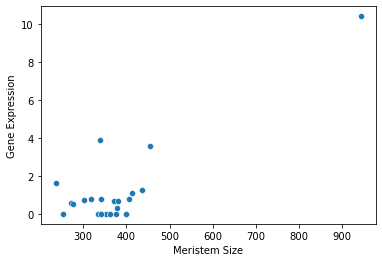

In [30]:
sns.scatterplot(data = plot_pearson, x = 'Meristem Size', y = 'Gene Expression')

In [31]:
expressed_genes_each_landrace.loc['GRMZM2G046532'].index == NAM_list_of_avg_meristem_sizes.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [32]:
expressed_genes_each_landrace.loc['GRMZM2G046532'].index

Index(['B73', 'B104', 'CML103', 'CML228', 'CML277', 'CML322', 'CML333',
       'CML52', 'CML69', 'fea3.2', 'Hp301', 'Il14H', 'Ki11', 'Ki3', 'M162W',
       'Mo17', 'Mo18W', 'Ms71', 'NC350', 'NC358', 'Oh7B', 'P39', 'Tx303',
       'Oh43', 'Tzi8'],
      dtype='object')

In [33]:
NAM_list_of_avg_meristem_sizes.index

Index(['B73', 'B104', 'CML103', 'CML228', 'CML277', 'CML322', 'CML333',
       'CML52', 'CML69', 'fea3.2', 'Hp301', 'Il14H', 'Ki11', 'Ki3', 'M162W',
       'Mo17', 'Mo18W', 'Ms71', 'NC350', 'NC358', 'Oh7B', 'P39', 'Tx303',
       'Oh43', 'Tzi8'],
      dtype='object')

In [34]:
expressed_genes_ranks = expressed_genes_each_landrace.mean(axis =1).rank()
expressed_genes_ranks

GRMZM2G059865    17354.0
GRMZM2G093399     3472.0
GRMZM2G023863    12126.0
GRMZM2G408834     4446.0
GRMZM2G330436    13648.0
                  ...   
RPS8.6            3774.0
RPL14             7655.0
GRMZM5G853305     2747.0
RPS3.1            7939.0
GRMZM2G372364    15072.0
Length: 18535, dtype: float64

In [35]:
expressed_genes_ranks['GRMZM2G109959']

5855.0

In [36]:
expressed_genes_ranks_no_fea = expressed_genes_each_landrace_no_fea.mean(axis =1).rank()

<AxesSubplot:ylabel='Count'>

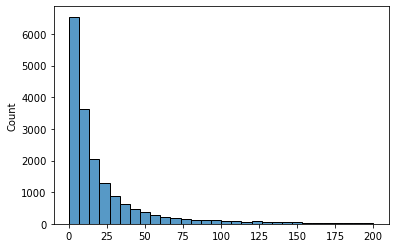

In [37]:
sns.histplot(expressed_genes_each_landrace.mean(axis =1), binrange = (0,200),bins = 30)

In [38]:
expressed_genes_each_landrace.max(axis =0)

B73       28513.902055
B104      34281.985731
CML103    32303.799712
CML228    27313.971088
CML277    30607.148550
CML322    25828.203581
CML333    27190.013399
CML52     19982.238003
CML69     34585.373075
fea3.2    25540.861478
Hp301     16365.795122
Il14H     23210.850690
Ki11      27847.883642
Ki3       22999.305780
M162W     34544.176657
Mo17      41189.566351
Mo18W     51557.652305
Ms71      27986.222470
NC350     15999.845944
NC358     27176.575714
Oh7B      30140.460619
P39       16998.023675
Tx303     28840.582636
Oh43      32926.294873
Tzi8      44351.488315
dtype: float64

In [39]:
expressed_genes_each_landrace

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,143.144668,31.036777,91.639810,90.869831,148.571780,108.115598,252.519616,231.787049,85.137739,85.636026,...,34.832808,78.768565,176.169776,121.582576,134.444064,80.364281,133.200355,122.903221,116.451243,179.361113
GRMZM2G093399,0.240740,0.000000,3.238375,4.189058,7.903092,3.562254,0.000000,2.392175,0.000000,0.000000,...,0.000000,0.175148,9.178438,2.169731,7.176268,7.080156,0.000000,7.323361,0.000000,5.860925
GRMZM2G023863,0.146034,0.365157,0.335237,30.393891,55.011622,30.914008,15.792235,0.557328,39.214014,0.297958,...,32.679142,3.770253,0.322728,44.736308,1.013255,15.092466,1.736260,27.198697,29.255513,61.654896
GRMZM2G408834,0.000000,0.762961,0.000000,6.608688,11.739555,11.061097,1.921412,7.140225,0.325744,0.265245,...,2.153667,8.778708,2.222961,1.509885,0.942847,2.210573,12.866794,11.003775,0.000000,2.505555
GRMZM2G330436,23.556611,23.907951,22.816125,30.709806,23.218506,48.636137,32.120847,30.448269,25.990195,24.250440,...,25.683409,25.680289,23.267585,21.316930,23.441772,25.585509,16.759448,17.029350,27.539661,24.696434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS8.6,3.902783,3.194491,0.408985,2.254022,5.403241,1.538835,5.356866,2.631734,3.516949,5.566602,...,7.089333,5.345010,3.046609,3.992719,2.335898,1.572898,2.339417,3.196946,6.074645,3.696632
RPL14,12.260508,8.422706,5.135804,7.140763,10.519619,7.773417,11.813620,5.289157,8.989143,9.676125,...,6.958649,8.903441,11.148463,13.264209,5.797202,6.451270,8.224565,3.119260,10.619030,5.860925
GRMZM5G853305,2.133742,2.933304,4.988307,3.279832,5.740553,2.012809,3.292881,0.769755,3.582409,2.816015,...,2.245615,1.903917,1.827966,3.332873,2.645287,1.529712,1.169709,2.828629,1.126758,4.782163
RPS3.1,8.818898,9.250963,9.118402,7.295628,8.577716,7.001375,11.127886,7.388652,11.594319,6.624046,...,13.679365,8.554387,9.106171,6.978848,7.682200,5.611771,9.321064,11.216721,11.276549,6.501922


In [40]:
top_75_percentile_genes = expressed_genes_each_landrace.loc[expressed_genes_ranks> len(expressed_genes_ranks)*.25]
#top_75_percentile_genes = expressed_genes_each_landrace.loc[expressed_genes_ranks< 17000]
top_75_percentile_genes

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,143.144668,31.036777,91.639810,90.869831,148.571780,108.115598,252.519616,231.787049,85.137739,85.636026,...,34.832808,78.768565,176.169776,121.582576,134.444064,80.364281,133.200355,122.903221,116.451243,179.361113
GRMZM2G023863,0.146034,0.365157,0.335237,30.393891,55.011622,30.914008,15.792235,0.557328,39.214014,0.297958,...,32.679142,3.770253,0.322728,44.736308,1.013255,15.092466,1.736260,27.198697,29.255513,61.654896
GRMZM2G330436,23.556611,23.907951,22.816125,30.709806,23.218506,48.636137,32.120847,30.448269,25.990195,24.250440,...,25.683409,25.680289,23.267585,21.316930,23.441772,25.585509,16.759448,17.029350,27.539661,24.696434
GRMZM2G032104,20.117465,13.659466,19.349769,20.928534,15.856631,25.821275,13.999830,15.701054,12.767154,20.573264,...,10.550529,18.913772,24.770347,26.215315,19.881397,23.879592,22.754410,28.381332,22.266837,15.083901
GRMZM2G333069,1.031062,0.000000,0.817971,6.104229,0.377239,8.169278,4.664349,0.441376,15.634171,1.689609,...,0.607378,8.055980,10.970270,0.659846,4.053018,6.253151,0.000000,1.375472,11.803920,0.793658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATPI,5.022892,6.231765,5.953775,9.303564,6.941604,8.065431,8.649747,7.385696,6.057444,6.195232,...,8.580758,5.169002,4.373654,12.447811,7.527401,6.257195,7.054856,8.756409,7.122761,6.133763
RPS11.3,11.078048,12.418827,12.953502,11.209498,17.677762,8.772241,13.185088,11.675849,11.920064,12.554034,...,19.239363,10.223127,15.666652,11.318311,5.107320,9.157222,10.454168,19.391868,14.624579,9.417163
RPL14,12.260508,8.422706,5.135804,7.140763,10.519619,7.773417,11.813620,5.289157,8.989143,9.676125,...,6.958649,8.903441,11.148463,13.264209,5.797202,6.451270,8.224565,3.119260,10.619030,5.860925
RPS3.1,8.818898,9.250963,9.118402,7.295628,8.577716,7.001375,11.127886,7.388652,11.594319,6.624046,...,13.679365,8.554387,9.106171,6.978848,7.682200,5.611771,9.321064,11.216721,11.276549,6.501922


In [41]:
top_75_percentile_genes_no_fea = expressed_genes_each_landrace_no_fea[expressed_genes_ranks_no_fea> len(expressed_genes_ranks_no_fea)*.25]

In [42]:
variance_of_top_75 = top_75_percentile_genes.var(axis =1)
variance_of_top_75

GRMZM2G059865    3210.192403
GRMZM2G023863     351.525227
GRMZM2G330436      62.596382
GRMZM2G032104      23.269829
GRMZM2G333069      26.503065
                    ...     
ATPI                3.141512
RPS11.3            11.911182
RPL14               7.038581
RPS3.1              4.223162
GRMZM2G372364    1881.060772
Length: 13902, dtype: float64

(0.0, 500.0)

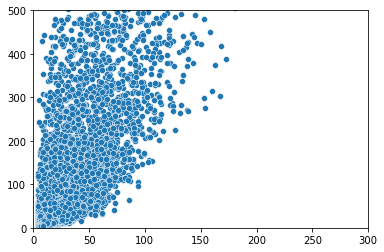

In [43]:
sns.scatterplot(y = variance_of_top_75, x = top_75_percentile_genes.mean(axis =1))
plt.xlim((0,300))
plt.ylim(0,500)

In [44]:
gene_quantile_values = pd.qcut(x =expressed_genes_ranks, q = 20, labels = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen'])

In [45]:
gene_quantile_values_2 = pd.qcut(x =expressed_genes_ranks, q = 10, labels = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine'])

In [46]:
gene_quantile_values_no_fea = pd.qcut(x =expressed_genes_ranks_no_fea, q = 20, labels = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen'])

In [47]:
quantile_list = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten','Eleven','Twelve','Thirteen','Fourteen','Fifteen','Sixteen','Seventeen','Eighteen','Nineteen']
quantile_list_2 = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [48]:
list_of_highly_variable_genes = []
for quant in quantile_list:
    panda_of_quant =  top_75_percentile_genes.loc[gene_quantile_values == quant]
    ranks_of_quant = panda_of_quant.var(axis =1).rank()
    top_25_ranking = len(ranks_of_quant)*.99
    top_genes_in_quant = ranks_of_quant[ranks_of_quant>top_25_ranking].index
    list_of_highly_variable_genes.extend(top_genes_in_quant)
    

In [49]:
# list_of_highly_variable_genes = []
# for quant in quantile_list_2:
#     panda_of_quant =  top_75_percentile_genes.loc[gene_quantile_values_2 == quant]
#     ranks_of_quant = panda_of_quant.var(axis =1).rank()
#     top_25_ranking = len(ranks_of_quant)*.99
#     top_genes_in_quant = ranks_of_quant[ranks_of_quant>top_25_ranking].index
#     list_of_highly_variable_genes.extend(top_genes_in_quant)
    

In [50]:
list_of_highly_variable_genes_no_fea = []
for quant in quantile_list:
    panda_of_quant_no_fea =  top_75_percentile_genes_no_fea.loc[gene_quantile_values_no_fea == quant]
    ranks_of_quant_no_fea = panda_of_quant_no_fea.var(axis =1).rank()
    top_25_ranking_no_fea = len(ranks_of_quant_no_fea)*.99
    top_genes_in_quant_no_fea = ranks_of_quant_no_fea[ranks_of_quant_no_fea>top_25_ranking_no_fea].index
    list_of_highly_variable_genes_no_fea.extend(top_genes_in_quant_no_fea)

In [51]:
print(len(list_of_highly_variable_genes))

151


In [52]:
highly_variable_and_expressed_genes = top_75_percentile_genes.loc[top_75_percentile_genes.index.isin(list_of_highly_variable_genes)]
highly_variable_and_expressed_genes

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059428,1.904511,2.274313,6.624248,0.812663,0.714551,0.740766,0.685734,0.769755,0.781631,33.861137,...,94.354552,66.862225,49.259052,0.659846,7.049438,4.999517,0.000000,30.202806,2.935482,2.478658
GRMZM2G171181,6453.713779,7736.878544,7096.331385,5330.051260,5791.719947,4017.122538,12535.143909,10790.460630,4782.384839,8923.649896,...,5252.998284,6865.816847,8839.349342,5026.299115,5317.237873,9477.206264,12969.506579,5517.581961,8145.206834,8617.641360
GRMZM2G062724,0.841652,0.000000,1.005710,0.716061,0.000000,199.998895,0.549944,0.899274,0.000000,0.000000,...,0.000000,4.600633,0.932050,0.503295,0.379797,3.524767,0.000000,0.290631,1.474818,0.382789
GRMZM2G145308,0.678992,0.469127,1.079458,2.893404,0.749218,0.409575,6.178390,1.098135,1.367659,1.624181,...,0.000000,108.310635,0.645456,6.162451,0.000000,0.536650,0.603157,2.382627,1.483863,46.396936
GRMZM2G088309,2.527928,5.605421,2.085168,2.733177,2.584965,7.147926,18.528388,4.259765,3.061063,2.950404,...,5.928616,1.324749,8.711175,51.088951,4.530981,7.933424,3.509126,0.000000,5.012376,0.863264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G046841,9938.496954,8580.512965,9830.186296,8876.517157,9719.731331,10636.889477,12194.206058,11264.661186,14701.948537,13545.369542,...,9830.114172,12855.890194,7327.540961,8025.830351,6315.605587,8367.476533,6582.099681,6229.523967,9451.814996,8538.863292
GRMZM2G018027,28.584760,4.691270,3.312124,4.992542,9.446714,18.541468,24.998708,4.144113,32.244797,73.357838,...,6.481130,31.744199,99.989684,7.985438,108.102304,24.300322,0.000000,2.169681,31.362114,9.425114
GRMZM2G429000,161.978702,188.881702,58.659501,9.709818,70.461218,7.832998,9.885425,46.152279,237.745892,105.816724,...,128.115287,251.944928,98.202805,26.785893,23.455756,8.103855,63.017843,12.825249,0.769653,6.982397
GRMZM2G153017,18.996225,17.700289,16.527114,18.277438,24.142222,12.501375,12.764151,16.042999,13.678927,16.961516,...,10.034273,156.174443,4.660249,33.138536,22.090674,5.798031,15.206211,77.958649,12.699860,11.666875


In [53]:
highly_variable_and_expressed_genes_no_fea = top_75_percentile_genes_no_fea.loc[top_75_percentile_genes_no_fea.index.isin(list_of_highly_variable_genes_no_fea)]
highly_variable_and_expressed_genes_no_fea

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,Hp301,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059428,1.904511,2.274313,6.624248,0.812663,0.714551,0.740766,0.685734,0.769755,0.781631,2.314623,...,94.354552,66.862225,49.259052,0.659846,7.049438,4.999517,0.000000,30.202806,2.935482,2.478658
GRMZM2G171181,6453.713779,7736.878544,7096.331385,5330.051260,5791.719947,4017.122538,12535.143909,10790.460630,4782.384839,4608.560257,...,5252.998284,6865.816847,8839.349342,5026.299115,5317.237873,9477.206264,12969.506579,5517.581961,8145.206834,8617.641360
GRMZM2G062724,0.841652,0.000000,1.005710,0.716061,0.000000,199.998895,0.549944,0.899274,0.000000,0.509219,...,0.000000,4.600633,0.932050,0.503295,0.379797,3.524767,0.000000,0.290631,1.474818,0.382789
GRMZM2G145308,0.678992,0.469127,1.079458,2.893404,0.749218,0.409575,6.178390,1.098135,1.367659,88.332641,...,0.000000,108.310635,0.645456,6.162451,0.000000,0.536650,0.603157,2.382627,1.483863,46.396936
GRMZM2G043976,12.263865,19.695339,0.744222,0.406331,0.000000,59.109916,0.000000,0.228949,0.455886,0.000000,...,0.000000,0.287049,7.923661,0.000000,54.129105,0.161375,0.000000,2.963890,0.000000,4.420684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRMZM2G046841,9938.496954,8580.512965,9830.186296,8876.517157,9719.731331,10636.889477,12194.206058,11264.661186,14701.948537,8334.147273,...,9830.114172,12855.890194,7327.540961,8025.830351,6315.605587,8367.476533,6582.099681,6229.523967,9451.814996,8538.863292
GRMZM2G018027,28.584760,4.691270,3.312124,4.992542,9.446714,18.541468,24.998708,4.144113,32.244797,13.686222,...,6.481130,31.744199,99.989684,7.985438,108.102304,24.300322,0.000000,2.169681,31.362114,9.425114
GRMZM2G429000,161.978702,188.881702,58.659501,9.709818,70.461218,7.832998,9.885425,46.152279,237.745892,156.239039,...,128.115287,251.944928,98.202805,26.785893,23.455756,8.103855,63.017843,12.825249,0.769653,6.982397
GRMZM2G153017,18.996225,17.700289,16.527114,18.277438,24.142222,12.501375,12.764151,16.042999,13.678927,12.978277,...,10.034273,156.174443,4.660249,33.138536,22.090674,5.798031,15.206211,77.958649,12.699860,11.666875


(0.0, 500.0)

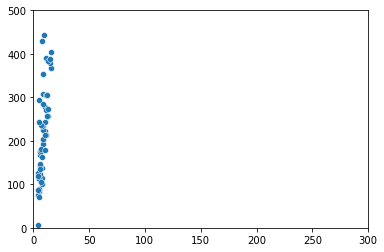

In [54]:
sns.scatterplot(x = highly_variable_and_expressed_genes.mean(axis =1), y = highly_variable_and_expressed_genes.var(axis = 1))
plt.xlim((0,300))
plt.ylim(0,500)

In [55]:
expressed_genes_each_landrace

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,fea3.2,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,143.144668,31.036777,91.639810,90.869831,148.571780,108.115598,252.519616,231.787049,85.137739,85.636026,...,34.832808,78.768565,176.169776,121.582576,134.444064,80.364281,133.200355,122.903221,116.451243,179.361113
GRMZM2G093399,0.240740,0.000000,3.238375,4.189058,7.903092,3.562254,0.000000,2.392175,0.000000,0.000000,...,0.000000,0.175148,9.178438,2.169731,7.176268,7.080156,0.000000,7.323361,0.000000,5.860925
GRMZM2G023863,0.146034,0.365157,0.335237,30.393891,55.011622,30.914008,15.792235,0.557328,39.214014,0.297958,...,32.679142,3.770253,0.322728,44.736308,1.013255,15.092466,1.736260,27.198697,29.255513,61.654896
GRMZM2G408834,0.000000,0.762961,0.000000,6.608688,11.739555,11.061097,1.921412,7.140225,0.325744,0.265245,...,2.153667,8.778708,2.222961,1.509885,0.942847,2.210573,12.866794,11.003775,0.000000,2.505555
GRMZM2G330436,23.556611,23.907951,22.816125,30.709806,23.218506,48.636137,32.120847,30.448269,25.990195,24.250440,...,25.683409,25.680289,23.267585,21.316930,23.441772,25.585509,16.759448,17.029350,27.539661,24.696434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS8.6,3.902783,3.194491,0.408985,2.254022,5.403241,1.538835,5.356866,2.631734,3.516949,5.566602,...,7.089333,5.345010,3.046609,3.992719,2.335898,1.572898,2.339417,3.196946,6.074645,3.696632
RPL14,12.260508,8.422706,5.135804,7.140763,10.519619,7.773417,11.813620,5.289157,8.989143,9.676125,...,6.958649,8.903441,11.148463,13.264209,5.797202,6.451270,8.224565,3.119260,10.619030,5.860925
GRMZM5G853305,2.133742,2.933304,4.988307,3.279832,5.740553,2.012809,3.292881,0.769755,3.582409,2.816015,...,2.245615,1.903917,1.827966,3.332873,2.645287,1.529712,1.169709,2.828629,1.126758,4.782163
RPS3.1,8.818898,9.250963,9.118402,7.295628,8.577716,7.001375,11.127886,7.388652,11.594319,6.624046,...,13.679365,8.554387,9.106171,6.978848,7.682200,5.611771,9.321064,11.216721,11.276549,6.501922


In [56]:
corr_and_p_value_list = []
for land_race_gene in highly_variable_and_expressed_genes.iterrows():
    current_correlation, current_pvalue = stats.spearmanr(land_race_gene[1],NAM_list_of_avg_meristem_sizes)
    current_values_to_append = [current_correlation,current_pvalue]
    corr_and_p_value_list.append(current_values_to_append)

In [57]:
corr_and_p_value_list_no_fea = []
for land_race_gene in normalized_mean_values_no_fea_mutant.iterrows():
    current_correlation, current_pvalue = stats.spearmanr(land_race_gene[1],NAM_list_of_avg_meristem_sizes_no_fea)
    current_values_to_append = [current_correlation,current_pvalue]
    corr_and_p_value_list_no_fea.append(current_values_to_append)

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [58]:
stats.spearmanr(land_race_gene[1],NAM_list_of_avg_meristem_sizes_no_fea)

SpearmanrResult(correlation=0.26831920616905264, pvalue=0.20489835737498796)

In [59]:
land_race_gene[1]

B73       38.446233
B104      22.860686
CML103    34.421945
CML228    28.297044
CML277    18.219970
CML322    27.654795
CML333    39.154677
CML52     19.350970
CML69     18.564314
Hp301      7.149406
Il14H     86.282605
Ki11      22.501335
Ki3       38.421437
M162W     22.063656
Mo17      35.624908
Mo18W     40.648758
Ms71      19.144391
NC350     17.324210
NC358     31.713390
Oh7B      37.752169
P39       96.555862
Tx303     17.610613
Oh43      16.675585
Tzi8      72.510173
Name: GRMZM2G372364, dtype: float64

In [60]:
normalized_mean_values_no_fea_mutant

,B73,B104,CML103,CML228,CML277,CML322,CML333,CML52,CML69,Hp301,...,Mo17,Mo18W,Ms71,NC350,NC358,Oh7B,P39,Tx303,Oh43,Tzi8
GRMZM2G059865,143.144668,31.036777,91.639810,90.869831,148.571780,108.115598,252.519616,231.787049,85.137739,120.487991,...,34.832808,78.768565,176.169776,121.582576,134.444064,80.364281,133.200355,122.903221,116.451243,179.361113
GRMZM2G093344,1.080938,1.095471,1.153207,1.078710,0.709291,0.425818,0.549944,0.328379,1.563262,0.509219,...,1.822133,1.185299,0.000000,2.482834,0.000000,0.571473,0.566552,0.290631,0.380304,0.000000
GRMZM2G093399,0.240740,0.000000,3.238375,4.189058,7.903092,3.562254,0.000000,2.392175,0.000000,9.695504,...,0.000000,0.175148,9.178438,2.169731,7.176268,7.080156,0.000000,7.323361,0.000000,5.860925
GRMZM5G809743,0.000000,0.000000,0.000000,0.000000,0.377239,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.659846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRMZM5G833153,0.135217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.503295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPS3.1,8.818898,9.250963,9.118402,7.295628,8.577716,7.001375,11.127886,7.388652,11.594319,6.559579,...,13.679365,8.554387,9.106171,6.978848,7.682200,5.611771,9.321064,11.216721,11.276549,6.501922
NDHD,0.951029,0.938254,0.408985,0.856365,0.714551,0.329327,0.000000,0.769755,0.781631,0.418627,...,1.399477,0.117788,0.609322,0.503295,0.000000,0.488293,1.736260,3.467468,0.792852,2.011632
PSAC,0.000000,0.000000,0.000000,0.154865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.515430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC191109.3_FG001,0.237184,0.000000,0.000000,0.280608,0.337312,0.000000,0.000000,0.212427,0.651489,0.000000,...,0.000000,0.087574,0.609322,0.000000,0.000000,0.000000,1.699656,0.000000,0.000000,0.000000


In [61]:
stats_and_pearson_calculated = pd.DataFrame(index = highly_variable_and_expressed_genes.index, data = corr_and_p_value_list, columns = ['Pearson Correlation with Meristem Width','P Value'])
stats_and_pearson_calculated = stats_and_pearson_calculated.dropna()

In [62]:
stats_and_pearson_calculated_no_fea = pd.DataFrame(index = normalized_mean_values_no_fea_mutant.index, data = corr_and_p_value_list_no_fea, columns = ['Pearson Correlation with Meristem Width','P Value'])
stats_and_pearson_calculated_no_fea = stats_and_pearson_calculated_no_fea.dropna()

In [63]:
corr_and_p_value_list

[[0.08386228275922909, 0.6902266061395057],
 [-0.1623389143320857, 0.43816066233978135],
 [-0.018118775817119865, 0.9314961638883911],
 [0.09792227779915351, 0.6414538799605813],
 [-0.38507405982563453, 0.057322425312944465],
 [-0.16218382567521286, 0.43860426539694974],
 [0.1902498777901914, 0.3623439635381678],
 [0.5174072032622162, 0.008077138224641065],
 [-0.16887863362982375, 0.4196755176092578],
 [0.48249326664101577, 0.014575579933604135],
 [0.004231583075006973, 0.9839837615836519],
 [0.22181571232737293, 0.286584421666134],
 [0.31313714755051597, 0.12746971896129494],
 [0.1619542249616305, 0.4392614386509184],
 [0.09809578946607074, 0.6408604101842836],
 [-0.16695518677754784, 0.42506739689450324],
 [0.1370548832953514, 0.5135727067129194],
 [0.08734128510965755, 0.6780367732114161],
 [-0.01808040041139343, 0.9316409222777284],
 [0.10925178120927094, 0.6031660144235391],
 [-0.10477379059464965, 0.6181849707210949],
 [-0.19307157445618967, 0.35513404185332786],
 [-0.11656087924

In [64]:
stats_and_pearson_calculated_no_fea.sort_values(by = 'P Value').head(50)

,Pearson Correlation with Meristem Width,P Value
GRMZM2G328171,0.724403,0.000063
GRMZM2G148198,0.706844,0.000113
GRMZM2G002529,0.695236,0.000163
GRMZM2G059958,0.678843,0.000265
GRMZM2G105787,0.677539,0.000276
GRMZM2G160334,-0.677340,0.000277
GRMZM2G153766,0.673625,0.000308
GRMZM2G123585,-0.671015,0.000332
GRMZM2G036905,0.669276,0.000348
GRMZM2G112228,0.657075,0.000486


<AxesSubplot:xlabel='P Value', ylabel='Count'>

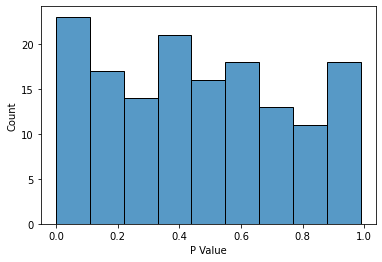

In [65]:
sns.histplot(data = stats_and_pearson_calculated, x = 'P Value')

In [66]:
reject, corrected, value_3, value_4 = statsmodels.stats.multitest.multipletests(stats_and_pearson_calculated['P Value'],method = 'fdr_bh')
stats_and_pearson_calculated['Corrected P Value'] = corrected

In [67]:
stats_and_pearson_calculated.sort_values(by = 'Corrected P Value', ascending= True)

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G109959,0.676726,0.000204,0.030733
GRMZM2G053720,0.517407,0.008077,0.447073
GRMZM2G149323,0.512022,0.008882,0.447073
GRMZM2G080466,0.475091,0.016396,0.495162
GRMZM2G050961,0.482493,0.014576,0.495162
...,...,...,...
GRMZM5G870932,0.010771,0.959245,0.986841
GRMZM2G111774,-0.003111,0.988224,0.988224
GRMZM2G468111,-0.007694,0.970884,0.988224
GRMZM2G139805,0.006160,0.976687,0.988224


In [68]:
reject, corrected_no_fea, value_3, value_4 = statsmodels.stats.multitest.multipletests(stats_and_pearson_calculated_no_fea['P Value'],method = 'fdr_bh')
stats_and_pearson_calculated_no_fea['Corrected P Value'] = corrected_no_fea

In [70]:
stats_and_pearson_calculated_no_fea.sort_values(by = 'Corrected P Value', ascending= True)

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G059865,-0.279626,0.185724,0.999195
GRMZM2G356076,0.038439,0.858468,0.999195
GRMZM2G056081,-0.027397,0.898879,0.999195
TIF5A.1,-0.149163,0.486652,0.999195
GRMZM2G432796,0.116982,0.586185,0.999195
...,...,...,...
GRMZM2G112617,0.000000,1.000000,1.000000
GRMZM2G110345,0.000000,1.000000,1.000000
GRMZM2G392345,0.000000,1.000000,1.000000
GRMZM2G035526,0.000000,1.000000,1.000000


In [71]:
stats_and_pearson_calculated_no_fea = stats_and_pearson_calculated_no_fea.rename(columns={'Pearson Correlation with Meristem Width':'Spearman Correlation with Meristem Width'})

In [ ]:
#stats_and_pearson_calculated_no_fea.to_csv('/data/passala/Generated_Tables/Penelope_data/outliers_removed_all_gene_spearman_correlation_with_meristem.csv')

In [72]:
significant_genes = stats_and_pearson_calculated.loc[stats_and_pearson_calculated['Corrected P Value'] < .05]
significant_genes.sort_values(by = 'Corrected P Value').head(10)

,Pearson Correlation with Meristem Width,P Value,Corrected P Value
GRMZM2G109959,0.676726,0.000204,0.030733


In [ ]:
import GO_Enrichment_Calculator
import Go_annotations

In [ ]:
maize_go_annotations = Go_annotations.get_go_annotations_as_panda('maize')
maize_go_annotations

In [ ]:
maize_converter = pd.read_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/ensmbl_to_grm_table.csv')
maize_converter

In [ ]:
converted_genes = significant_genes.merge(right = maize_converter, left_index= True, right_on= 'GRM Name')
converted_genes

In [ ]:
list_of_significant_converted_genes = converted_genes['EnsemblID'].to_list()
list_of_significant_converted_genes

In [ ]:
contigency_tables = GO_Enrichment_Calculator.generate_contigency_tables(maize_go_annotations, list_of_significant_converted_genes)

In [ ]:
fishers_results = GO_Enrichment_Calculator.fishers_exact_on_contigency_tables(contigency_tables, maize_go_annotations)

In [ ]:
fishers_results.sort_values(by = 'P_value').head(40)

In [ ]:
corrected_results = GO_Enrichment_Calculator.multi_hypothesis_correct_fishers_exact(fishers_results)

In [ ]:
corrected_results.sort_values(by = 'P_value')